In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 指定默认字体 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

In [2]:
file_path = 'data/catering_sale.xls'
data = pd.read_excel(file_path)
data.head()

,日期,销量
0,2015-03-01,51.0
1,2015-02-28,2618.2
2,2015-02-27,2608.4
3,2015-02-26,2651.9
4,2015-02-25,3442.1


In [3]:
data.shape

(201, 2)

In [4]:
# 销量有一个为空
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
日期    201 non-null datetime64[ns]
销量    200 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB


In [5]:
data.isnull().mean()

日期    0.000000
销量    0.004975
dtype: float64

In [6]:
data[data['销量'].isnull()]

,日期,销量
14,2015-02-14,NaN


In [8]:
# 从下面数据中可以看出9106.44可能为异常数据
data.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
销量,200.0,2755.2147,751.029772,22.0,59.91,2264.67,2451.975,2655.85,3026.125,3316.64,4090.622,9106.44


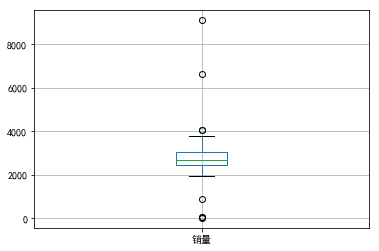

In [18]:
# 下面通过箱型图来分析
axes = data.boxplot(column=['销量'], return_type='dict')

In [19]:
# dir(axes)
# axes.get_xticks[0]
axes

{'whiskers': [<matplotlib.lines.Line2D at 0x1235b2438>,
 'caps': [<matplotlib.lines.Line2D at 0x1235b2ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x123593f98>],
 'medians': [<matplotlib.lines.Line2D at 0x1235b2ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1235c44e0>],
 'means': []}

In [24]:
# fliers 为异常值的标签 这是一个数组 数组中是Line2D对象
axes['fliers'][0].get_xdata()

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [25]:
axes['fliers'][0].get_xydata()

array([[1.00000e+00, 5.10000e+01],
       [1.00000e+00, 8.65000e+02],
       [1.00000e+00, 2.20000e+01],
       [1.00000e+00, 6.00000e+01],
       [1.00000e+00, 6.60740e+03],
       [1.00000e+00, 4.06030e+03],
       [1.00000e+00, 9.10644e+03],
       [1.00000e+00, 4.06520e+03]])

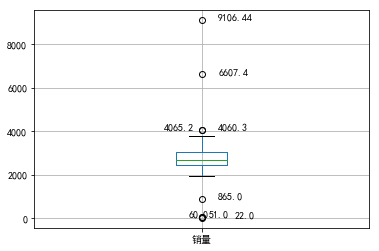

In [46]:
plt.figure()
axes = data.boxplot(column=['销量'], return_type='dict')
x = axes['fliers'][0].get_xdata()
y = axes['fliers'][0].get_ydata()
y = sorted(y)
for i in range(len(y)):
        if i > 0:
            plt.annotate(s=y[i], 
                         xy=(x[i], y[i]), 
                         xytext=(x[i] + 0.05 - 0.8 / (y[i] - y[i - 1]), y[i])
                        )
        else:
            plt.annotate(s=y[i],
                         xy=(x[i], y[i]), 
                         xytext=(x[i] + 0.1, y[i]),
#                          arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8, headlength=10)
                        )
plt.show()

In [73]:
bins = list(range(0, 4500, 500))
df = pd.cut(data['销量'],bins=bins)
df = pd.concat([data['销量'], pd.DataFrame(df)], axis=1)
df.columns = ['销量', '区间']
df.head()

,销量,区间
0,51.0,"(0, 500]"
1,2618.2,"(2500, 3000]"
2,2608.4,"(2500, 3000]"
3,2651.9,"(2500, 3000]"
4,3442.1,"(3000, 3500]"


In [96]:

# pd.DataFrame(df['区间'].value_counts(), columns=['组段', '频数'])
result = df['区间'].value_counts().reset_index()
result.columns=['组段', '频数']
result = result.sort_values(by=['组段'])
result.index = range(len(result))
result['频率'] = result['频数'] / result['频数'].sum()
result['累计频率'] = result['频率'].cumsum()
result['频率'] = result['频率'].apply(lambda x: format(x, '.2%'))
result['累计频率'] = result['累计频率'].apply(lambda x: format(x, '.2%'))
result

,组段,频数,频率,累计频率
0,"(0, 500]",3,1.53%,1.53%
1,"(500, 1000]",1,0.51%,2.04%
2,"(1000, 1500]",0,0.00%,2.04%
3,"(1500, 2000]",1,0.51%,2.55%
4,"(2000, 2500]",53,27.04%,29.59%
5,"(2500, 3000]",87,44.39%,73.98%
6,"(3000, 3500]",44,22.45%,96.43%
7,"(3500, 4000]",7,3.57%,100.00%


In [97]:
df[(df['销量'] > 2500) & (df['销量'] < 3001)].reset_index().head()

,index,销量,区间
0,1,2618.2,"(2500, 3000]"
1,2,2608.4,"(2500, 3000]"
2,3,2651.9,"(2500, 3000]"
3,13,2699.3,"(2500, 3000]"
4,18,2742.8,"(2500, 3000]"
